In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

from collections import OrderedDict

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib_utils import plot_direction_field

ModuleNotFoundError: No module named 'matplotlib'

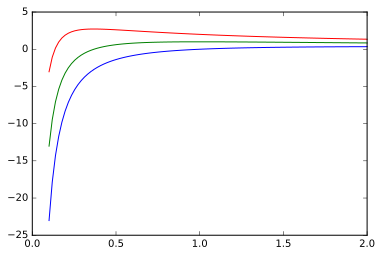

In [ ]:
# 9.1.6
def fn(x, C):
    return (np.log(x) + C) / x


x = np.linspace(0.1, 2, 100)
_ = plt.plot(x, fn(x, 0), 'b',
             x, fn(x, 1), 'g',
             x, fn(x, 2), 'r')

/Users/dan/tmp/virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()


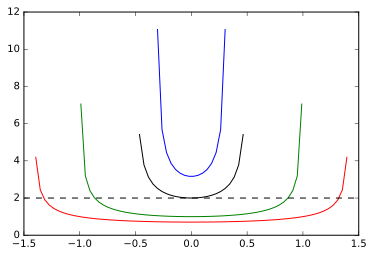

In [ ]:
# 9.1.8
def fn(x, c):
    return (c - x**2)**(-1/2)

x = np.linspace(-2, 2, 100)
_ = plt.plot(x, fn(x, 0.1), 'b',
             x, fn(x, 1), 'g',
             x, fn(x, 2), 'r',
             x, fn(x, 1/4), 'k')
_ = plt.axhline(y=2, color='k', ls='--')

/Users/dan/tmp/virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log
/Users/dan/tmp/virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log


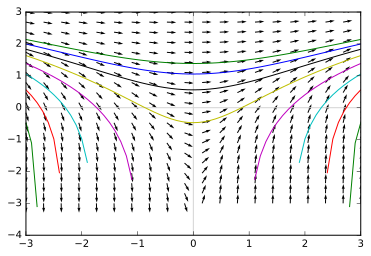

In [ ]:
# 9.3.2

def deriv1(x, y):
    return x * np.exp(-y)

def soln(x, C):
    return np.log(x**2/2 + C)

plot_direction_field(deriv1, (-3, 3), (-3, 3))
xs = np.linspace(-3, 3, 61)
for C in np.linspace(-5, 4, 9):
    plt.plot(xs, soln(xs, C))

/Users/dan/tmp/virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log
/Users/dan/tmp/virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log
/Users/dan/tmp/virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in power


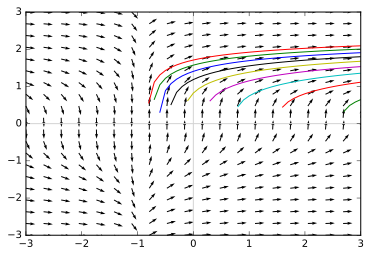

In [ ]:
# 9.3.4

def deriv1(x, y):
    return 1/(1 + x) * 1/(y ** 2)

def soln(x, C):
    return np.power(3 * np.log(1 + x) + C, 1/3)

plot_direction_field(deriv1, (-3, 3), (-3, 3))
xs = np.linspace(-3, 3, 61)
for C in np.linspace(-5, 5, 10):
    plt.plot(xs, soln(xs, C))

/Users/dan/tmp/virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log
/Users/dan/tmp/virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt


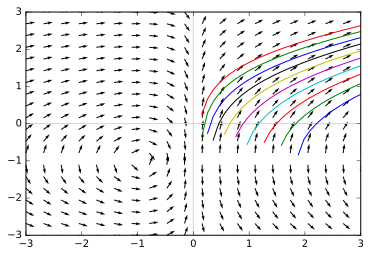

In [ ]:
# 9.3.6

def deriv1(s, v):
    return (1 + s) / (s*(1 + v))

def soln(s, C, sign):
    return -1 + sign * np.sqrt(2*s + 2*np.log(s) + C)

plot_direction_field(deriv1, (-3, 3), (-3, 3))
ss = np.linspace(-3, 3, 60)
for C in np.linspace(-5, 5, 10):
    plt.plot(ss, soln(ss, C, 1))

/Users/dan/tmp/virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log


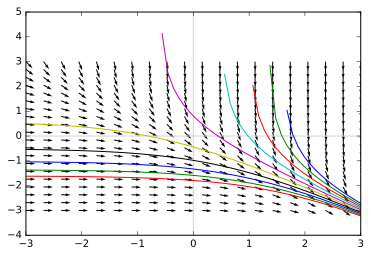

In [ ]:
# 9.3.10

def deriv1(t, z):
    return -np.exp(t + z)

def soln(t, C):
    return -np.log(np.exp(t) + C)

plot_direction_field(deriv1, (-3, 3), (-3, 3))
ss = np.linspace(-3, 3, 60)
for C in np.linspace(-5, 5, 10):
    plt.plot(ss, soln(ss, C))

/Users/dan/tmp/virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log
/Users/dan/tmp/virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in log


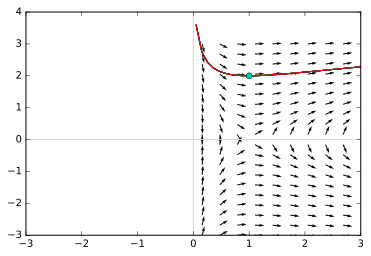

In [ ]:
# 9.3.12

def deriv1(x, y):
    return np.log(x) / (x * y)

def soln(x, C):
    return np.sqrt(np.log(x)**2 + 4)

plot_direction_field(deriv1, (-3, 3), (-3, 3))
ss = np.linspace(-3, 3, 60)
for C in np.linspace(-5, 5, 10):
    plt.plot(ss, soln(ss, C))
    
_ = plt.plot([1], [2], "o")

/Users/dan/tmp/virtualenvs/jupyter/lib/python3.5/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt


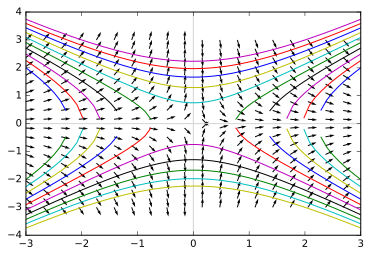

In [ ]:
# 9.3.12

def deriv1(x, y):
    return -y/x

def orth(x, C):
    return np.sqrt(x**2 + C)

plot_direction_field(deriv1, (-3, 3), (-3, 3))
ss = np.linspace(-3, 3, 60)
for C in np.linspace(-5, 5, 10):
    plt.plot(ss, orth(ss, C))
    plt.plot(ss, -orth(ss, C))


In [ ]:
def euler(x, y, dydx, h, n):
    points = []
    for i in range(n + 1):
        points.append((x, y))
        y += h * dydx(x, y)
        x += h
    return points

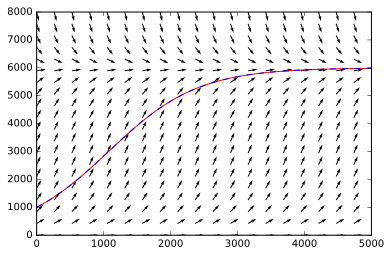

In [ ]:
# 9.4.2.b
k = 0.0015
M = 6000

def dPdt(t, P):
    "Logistic differential equation"
    return k*P*(1 - P/M)

A = 5  # Initial condition P(0) = 1000

def P(t):
    "Solution to logistic differential equation for specified initial value"
    return M / (1 + A * np.exp(-k * t))


plot_direction_field(dPdt, (0, 5000), (0, 8000))

tt, pp_euler = map(np.array, zip(*euler(0, 1000, dPdt, 1, 5000)))
_ = plt.plot(tt, pp_euler, "r-")
_ = plt.plot(tt, P(tt), "b--")

,year,P,P_Euler
0,0,1000.000000,1000.000000
1,1,1001.250625,1001.250000
2,2,1002.502501,1002.501250
3,3,1003.755627,1003.753749
4,4,1005.010005,1005.007500
5,5,1006.265635,1006.262501
6,6,1007.522517,1007.518753
7,7,1008.780652,1008.776258
8,8,1010.040040,1010.035015
9,9,1011.300681,1011.295025


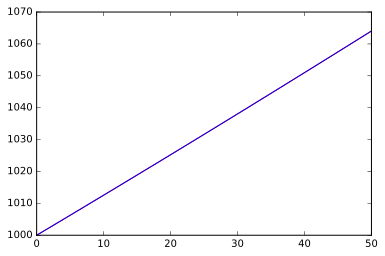

In [ ]:


tt, pp_euler = map(np.array, zip(*euler(0, 1000, dPdt, 1, 50)))
pp = P(tt)
_ = plt.plot(tt, pp_euler, "r")
_ = plt.plot(tt, P(tt), "b")
pd.DataFrame(dict(year=tt, P=pp, P_Euler=pp_euler), columns=["year", "P", "P_Euler"])

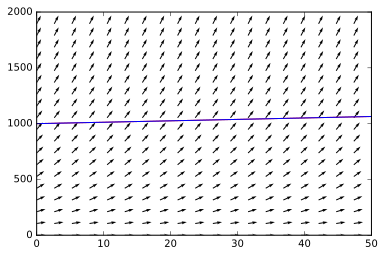

In [ ]:
# Why doesn't the direction field match the solution?
plot_direction_field(dPdt, (0, 50), (0, 2000))
_ = plt.plot(tt, pp_euler, "r")
_ = plt.plot(tt, P(tt), "b")

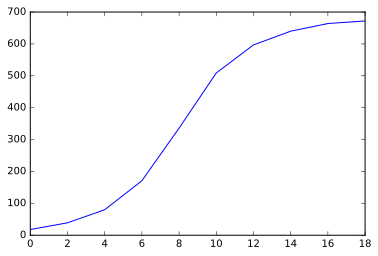

In [ ]:
# 9.4.6

yeast = pd.DataFrame.from_records([
        (0, 18),
        (2, 39),
        (4, 80),
        (6, 171),
        (8, 336),
        (10, 509),
        (12, 597),
        (14, 640),
        (16, 664),
        (18, 672),
    ], columns=("hour", "cells"))

b) initial growth rate $\approx \frac{39-18}{2} \text{cells/hr} = 10.5 \text{cells/hr}$
initial relative growth rate = $10.5/18 = $

c) Exponential model: $ \frac{dP}{dt} = kP$

solution: $P = Ae^{kP}$

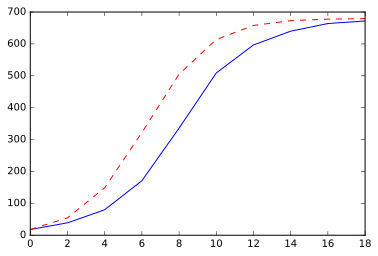

In [ ]:
# b. Initial growth rate estimate
dPdt_0 = 10.5

# these two together imply
k = dPdt_0 / yeast["cells"][0]

# Exponential model
# initial condition P(0) = 18 implies
A_exp = yeast["cells"][0]
def P_exp(t):
    return A_exp * np.exp(k * t)

# Logistic model
M = 680
# Initial conditions imply
A_log = 680/18 - 1
def P_log(t):
    return M / (1 + A_log * np.exp(-k * t))


t = yeast["hour"]
_ = plt.plot(t, yeast["cells"])
# plt.plot(t, P_exp(t), "b-")
_ = plt.plot(t, P_log(t), "r--")

In [ ]:
# 9.8
M = 1000  # carrying capacity 1 billion
A = 3
k = np.log((M/275 - 1)/A)/(-10)

def P(t):
    return M / (1 + A*np.exp(-k*t))

In [ ]:
P(110), P(210)

(579.98620373648987, 834.08145252464305)

In [ ]:
def t(P):
    return np.log((M/P - 1)/A) / (-k)

1990 + np.log((M/350 - 1)/A)/(-k)


1990.4044901381046

In [ ]:
M = 10000
A = 24
k = -np.log((10000/1200 - 1)/24)

In [ ]:
t(5000)

2.680491223650534

10.5/18
